# Optical Character Recognition using Python

This notebook contains the information about how to create an Optical character Recognition System using Python


In [10]:
# First we need to install required libraries
import pytesseract
import cv2

import matplotlib.pyplot as plt
from PIL import Image

For demonstration purporses, We will use the `test_img.jpeg` file to test the ocr model

In [11]:
# Read the image using OpenCV
image = cv2.imread('text_img.jpeg')

# or you can use pillow
# image = Image.open("text_img.jpeg")

The `image_to_string()` function does exactly what you expect, it converts the image containing text to characters, let's see the result

In [12]:
# Get the string from the image
string = pytesseract.image_to_string(image)

# Print the string
print(string)

Every good programmer wants to develop software that is correct, which means that
a program produces the right output for all the anticipated inputs in the program’s
application. In addition, we want software to be robust, that is, capable of handling
unexpected inputs that are not explicitly defined for its application. For example,
if a program is expecting a positive integer (perhaps representing the price of an
item) and instead is given a negative integer, then the program should be able to
recover gracefully from this error. More importantly, in life-critical applications,
where a software error can lead to injury or loss of life, software that is not robust
could be deadly. This point was driven home in the late 1980s in accidents involy-
ing Therac-25, a radiation-therapy machine, which severely overdosed six patients
between 1985 and 1987, some of whom died from complications resulting from
their radiation overdose. All six accidents were traced to software errors.



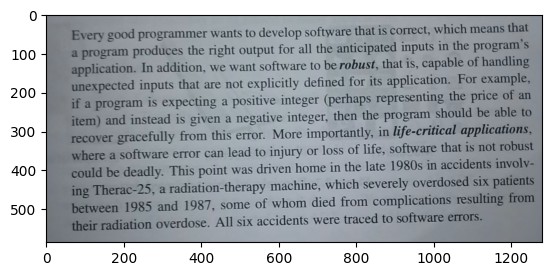

In [14]:
# Let's view the image
plt.imshow(image)

Excellent, there is another function `image_to_data()` which outputs more information than that, including words with their corresponding `width`, `height`, and `x` and `y` coordinates, this will enable us to make a lot of useful stuff. For instance, let's search for words in the document and draw a bounding box around a specific word of our choice, below code, handles that:


In [28]:
# make a copy of this image to draw in
image_copy = image.copy()

# the target word to search for
target_word = "in"


# Get all data from the image
data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

So we are going to search for the word `integer` in the text document, we want the output data to be structured and not a raw string, that's why I passed `output type` to be a dictonary, so we can easily get each word's data

In [29]:
# get all occurences of the that word
word_occurences = [ i for i, word in enumerate(data["text"]) if word.lower() == target_word ]

Now let's draw a surrounding box on each word

In [30]:
for occ in word_occurences:
    # extract the width, height, top and left position for that detected word
    w = data["width"][occ]
    h = data["height"][occ]
    l = data["left"][occ]
    t = data["top"][occ]
    # define all the surrounding box points
    p1 = (l, t)
    p2 = (l + w, t)
    p3 = (l + w, t + h)
    p4 = (l, t + h)
    # draw the 4 lines (rectangular)
    image_copy = cv2.line(image_copy, p1, p2, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p2, p3, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p3, p4, color=(255, 0, 0), thickness=2)
    image_copy = cv2.line(image_copy, p4, p1, color=(255, 0, 0), thickness=2)

Saving and showing the resulting image

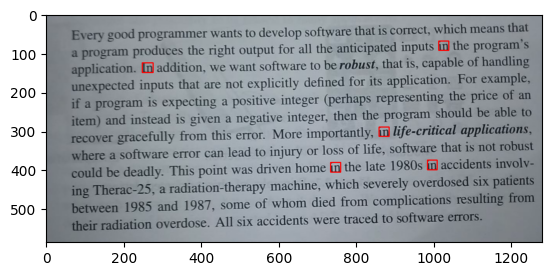

In [31]:
plt.imsave("all_dog_words.png", image_copy)
plt.imshow(image_copy)
plt.show()